In [35]:
import numpy as np
import matplotlib.pyplot as plt
#!pip install tensorflow
import tensorflow as tf
from tensorflow import keras

In [19]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [48]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics='accuracy')
model.fit(X_train/255,y_train, epochs=5) #X_train/255 to normalize dataset

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2716 - accuracy: 0.9226
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1212 - accuracy: 0.9637
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0842 - accuracy: 0.9740
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0648 - accuracy: 0.9801
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0517 - accuracy: 0.9840


In [29]:
model.evaluate(X_test/255, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0817 - accuracy: 0.9752


[0.08165368437767029, 0.9751999974250793]

In [30]:
y_test_pred=model.predict(X_test/255)

313/313 [==============================] - 0s 1ms/step


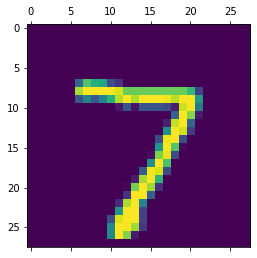

In [37]:
plt.matshow(X_test[0])

In [43]:
y_test_pred_tot=[np.argmax(i) for i in y_test_pred]
y_test_pred_tot[0]

7

In [44]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_test_pred_tot)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 969,    1,    2,    0,    0,    2,    3,    0,    2,    1],
       [   0, 1126,    3,    2,    0,    1,    2,    0,    1,    0],
       [   3,    3, 1003,    2,    1,    0,    0,   12,    8,    0],
       [   0,    0,    2,  989,    0,   10,    0,    3,    2,    4],
       [   1,    0,    0,    1,  952,    0,    9,    4,    0,   15],
       [   2,    0,    0,    8,    0,  880,    2,    0,    0,    0],
       [   5,    2,    1,    1,    4,   11,  932,    0,    2,    0],
       [   2,    1,    6,    8,    1,    1,    0, 1000,    0,    9],
       [   3,    1,    3,   10,    4,   16,    1,    3,  928,    5],
       [   2,    3,    1,   10,    6,   11,    0,    3,    0,  973]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

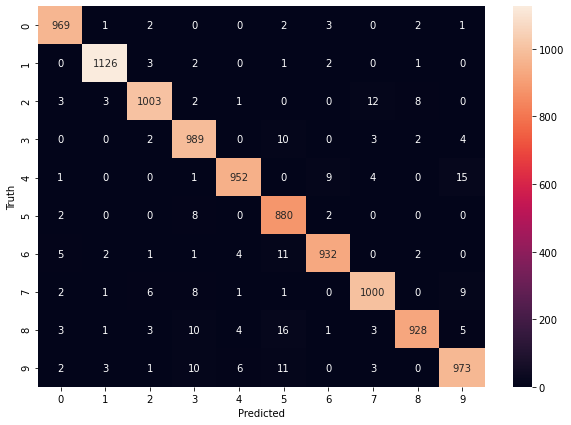

In [47]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')